In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv('mcdonalds.csv')
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
# 3. Convert "Yes"/"No" to 1/0 for first 11 columns
binary_cols = df.columns[:11]
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# Remove constant (zero variance) columns
valid_columns = [col for col in binary_cols if df[col].nunique() > 1]
X = df[valid_columns]


C:\Users\Workspace\AppData\Local\Temp\ipykernel_13664\3485015297.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)


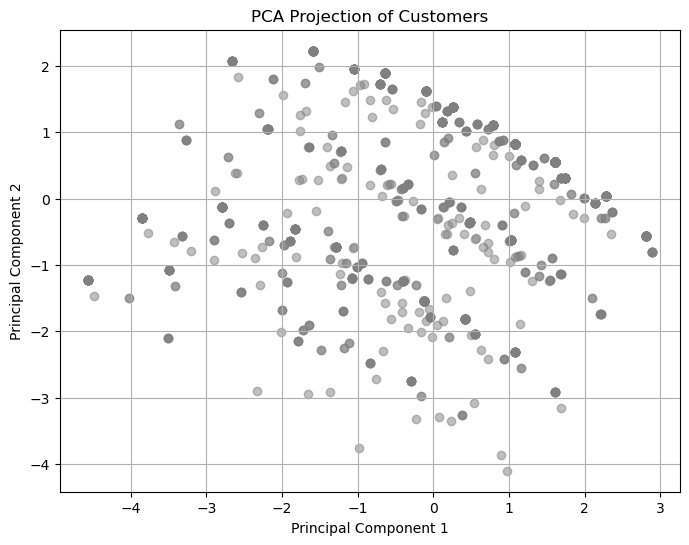

In [7]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.5)
plt.title("PCA Projection of Customers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


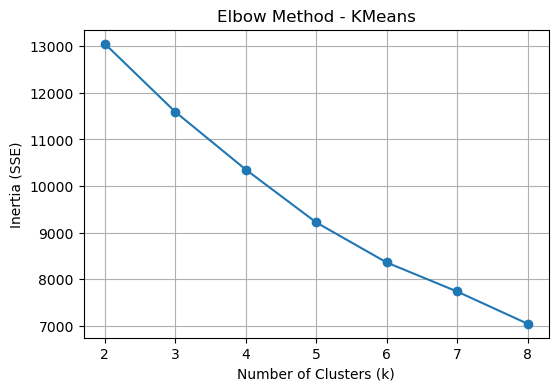

In [8]:
inertias = []
sil_scores = []

K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow plot
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method - KMeans")
plt.grid(True)
plt.show()


In [9]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)


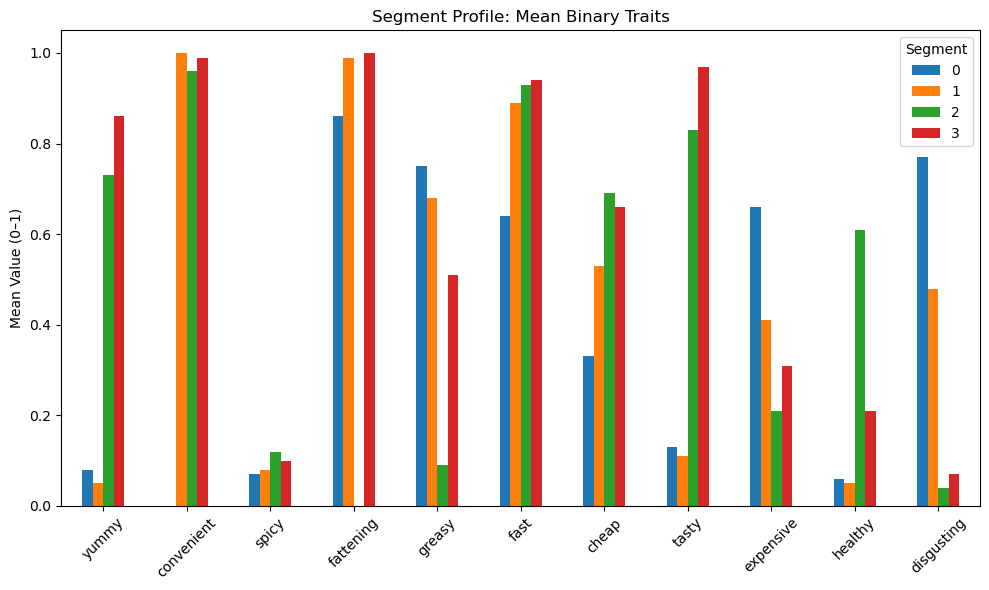

         yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
Segment                                                                    
0         0.08        0.00   0.07       0.86    0.75  0.64   0.33   0.13   
1         0.05        1.00   0.08       0.99    0.68  0.89   0.53   0.11   
2         0.73        0.96   0.12       0.00    0.09  0.93   0.69   0.83   
3         0.86        0.99   0.10       1.00    0.51  0.94   0.66   0.97   

         expensive  healthy  disgusting  
Segment                                  
0             0.66     0.06        0.77  
1             0.41     0.05        0.48  
2             0.21     0.61        0.04  
3             0.31     0.21        0.07  


In [10]:
segment_profiles = df.groupby('Segment')[valid_columns].mean().round(2)
segment_profiles.T.plot(kind='bar', figsize=(10,6))
plt.title("Segment Profile: Mean Binary Traits")
plt.ylabel("Mean Value (0–1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print as table
print(segment_profiles)


In [12]:
df.to_csv("mcdonalds_segmented.csv", index=False)